In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This is just generating data
n = 200
x1 = np.random.sample(n)*20
x2 = np.random.sample(n)*20 #-3*x1 
x3 = np.random.sample(n)*20

X = (x1,x2,x3)
a = np.random.sample(n)*20 + 50

B = (3.5,-1.5,.005)
b1,b2,b3 = B
y = b1*x1 + b2*x2 + b3*x3 + a

# We don't add the random error to our dataset because in real life it is unknown
df = pd.DataFrame({'feature1':x1,'feature2':x2,'feature3':x3})

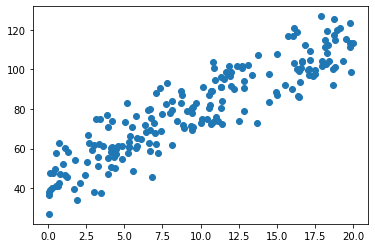

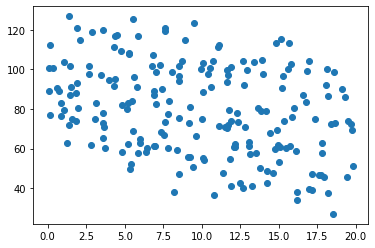

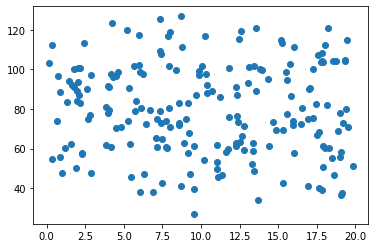

(200, 4)


,feature1,feature2,feature3,target
0,10.755913,6.882220,1.963180,89.187101
1,7.020086,14.431925,9.227847,68.052664
2,4.116486,9.425364,17.884275,50.869490
3,17.106056,9.949196,13.801928,100.014958
4,4.122406,3.704176,18.266281,60.200976


In [3]:
# Having a look at the data

df['target'] = y

# fig, ax = plt.subplots()
for x in X:
    plt.figure()
    plt.scatter(x,y)
    plt.show()

print(df.shape)
df.head()

In [4]:
# Pre-processing
X = df.drop('target',axis=1)
y = df['target']

### Regression in [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
from sklearn.linear_model import LinearRegression

# Setting up the LEARNER
model_skl = LinearRegression(fit_intercept=True,
                             normalize=False,
                             n_jobs=-1
                            )

# Actually LEARNING
model_skl.fit(X,y)

# Evaluating performance
r2 = model_skl.score(X,y)
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# Understanding the LEARNED model
est_a = model_skl.intercept_
est_B = model_skl.coef_
print('constant: {}'.format(round(est_a,4)))
print('coeficients: real {} vs {} estimated'.format(B,est_B.round(4)))

R2 = 0.94
constant: 58.6822
coeficients: real (3.5, -1.5, 0.005) vs [ 3.5364 -1.4082  0.0498] estimated


### Regression in [Statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) and its [Interpretation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults)

In [6]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.94
const       58.6822
feature1     3.5364
feature2    -1.4082
feature3     0.0498
dtype: float64


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Statsmodels superpower

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1008.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          7.79e-119
Time:                        15:36:51   Log-Likelihood:                -628.84
No. Observations:                 200   AIC:                             1266.
Df Residuals:                     196   BIC:                             1279.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.6822      1.272     46.128      0.000      56.173      61.191
feature1       3.5364      0.068     51.681      0.000       3.401       3.671
feature2      -1.4082      0.073    -19.348      0.000      -1.552      -1.265
feature3       0.0498      0.070      0.712      0.478      -0.088       0.188
==============================================================================
Omnibus:                       88.827   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.238
Skew:                          -0.108   Prob(JB):                      0.00220
Kurtosis:                       1.808   Cond. No.                         57.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicolinearity exploration

In [8]:
X.corr()

,const,feature1,feature2,feature3
const,NaN,NaN,NaN,NaN
feature1,NaN,1.000000,0.01416,-0.068068
feature2,NaN,0.014160,1.00000,0.044030
feature3,NaN,-0.068068,0.04403,1.000000


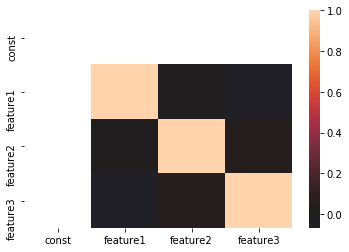

In [9]:
import seaborn as sns
sns.heatmap(X.corr(), center=0)